## Implementation of FEM Solution for Poission equation

Choosing $ u = \sin(\pi x)$ gives a convergence order greater than 3 which seems odd. Thus trying again with $u = x^3(1-x)^3$

Error L2;  0.0006300127939257247


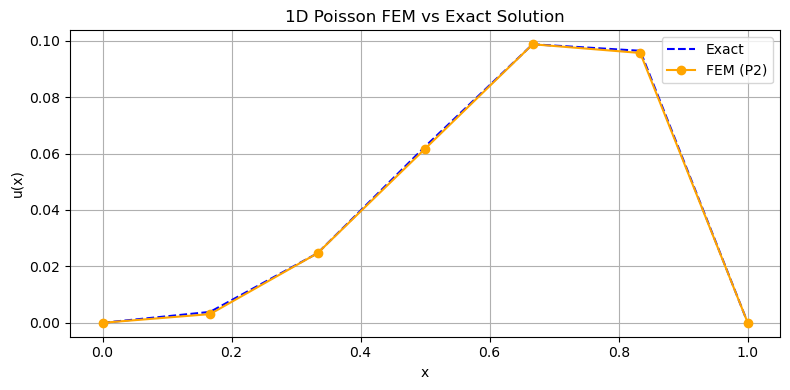

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Poisson import solve_poisson  # Import your FEM solver

# -------------------------------
# Choose exact solution and source term f(x)
# -------------------------------

# Example: u(x) = x^3 * (1 - x), so f(x) = -u''(x) = -6x + 12x**2
exact_sol = lambda x: (x**3) * (1 - x)
f = lambda x: -6*x + 12*x**2

# -------------------------------
# Mesh setup
# -------------------------------

M = 3  # number of elements (can increase later)
x_base = np.linspace(0, 1, 2*M + 1)
nodes = x_base[::2]  # Extract element endpoints: [x0, x2, ..., x_{2M}]

# -------------------------------
# Solve FEM problem
# -------------------------------

u_num, err_L2, err_H1, x_dofs = solve_poisson(nodes, f, exact_solution=exact_sol)

# Evaluate exact solution at all FEM DOFs
u_exact = exact_sol(x_dofs)

# -------------------------------
# Plot comparison
# -------------------------------

print("Error L2; ", err_L2)

plt.figure(figsize=(8, 4))
plt.plot(x_dofs, u_exact, label="Exact", linestyle='--', color='blue')
plt.plot(x_dofs, u_num, label="FEM (P2)", marker='o', color='orange')
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("1D Poisson FEM vs Exact Solution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Convergence plot with equidistriputed points

Trying with $u = x^3(1-x)$. We see that the convergence actually is of order $h^4$. This is better that the expected theoretical convergence.

h = 0.25000, L2 error = 1.993e-04
h = 0.12500, L2 error = 1.246e-05
h = 0.06250, L2 error = 7.787e-07
h = 0.03125, L2 error = 4.867e-08
h = 0.01562, L2 error = 3.042e-09
h = 0.00781, L2 error = 1.901e-10


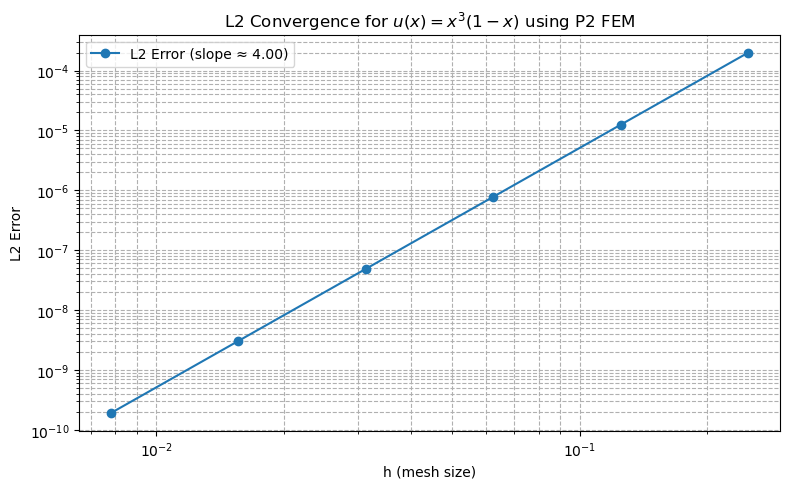

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Poisson import solve_poisson
from scipy.stats import linregress

# Exact solution and source term
exact = lambda x: (x**3) * (1 - x)
f = lambda x: 12 * x**2 - 6 * x  # Correct -u''(x)

# Mesh sizes and error list
hs = []
errors_L2 = []

# Loop over different mesh refinements
for M in [4, 8, 16, 32, 64,128]:
    x_base = np.linspace(0, 1, 2*M + 1)  # 2*M + 1 points for P2
    nodes = x_base[::2]  # Extract element endpoints: [x0, x2, ..., x_{2M}]
    
    u_num, err_L2, _, _ = solve_poisson(nodes, f, exact_solution=exact)
    h = 1.0 / M
    hs.append(h)
    errors_L2.append(err_L2)
    print(f"h = {h:.5f}, L2 error = {err_L2:.3e}")

# Compute convergence rate
log_h = np.log(hs)
log_err = np.log(errors_L2)
slope, intercept, _, _, _ = linregress(log_h, log_err)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(hs, errors_L2, 'o-', label=f"L2 Error (slope ≈ {slope:.2f})")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("h (mesh size)")
plt.ylabel("L2 Error")
plt.title(r"L2 Convergence for $u(x) = x^3(1 - x)$ using P2 FEM")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()


### Convergence plot with non-equidistriputed points

Now we again plot convergence with a random partitions createing M elements of random sizes. 